In [1]:
import pandas as pd
from pandas_datareader import data
# import yfinance as yf
# pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import seaborn as sns
# import os
import random

import torch
# import matplotlib as mpl
# import matplotlib.pyplot as plt
import numpy as np
# import pandas as pd
# pd.options.mode.chained_assignment = None
# import seaborn as sns
from tqdm import tqdm

c:\Program Files\Python37\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2000-01-01'  # '2014-01-01'  # 2012-10-21
end_date = '2022-11-22'  # '2014-10-20'  # 2022

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = data.DataReader('GOOGL', 'yahoo', start_date, end_date)

# Resample the data to normalize it, the data comes without any data on the (days that the markets are close, weekends)
panel_data = panel_data.resample("D").max()

# Fill the data in the closed markets with the data from the previous trading day, because it is their true value
panel_data = panel_data.fillna(method="ffill")

panel_data[panel_data.index.name] = panel_data.index
panel_data.index.name = None
panel_data = panel_data[['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close']]
panel_data.reset_index(drop=True, inplace=True)

panel_data.head(20)

,Date,High,Low,Open,Close,Volume,Adj Close
0,2004-08-19,2.604104,2.401401,2.502503,2.511011,893181924.0,2.511011
1,2004-08-20,2.729730,2.515015,2.527778,2.710460,456686856.0,2.710460
2,2004-08-21,2.729730,2.515015,2.527778,2.710460,456686856.0,2.710460
3,2004-08-22,2.729730,2.515015,2.527778,2.710460,456686856.0,2.710460
4,2004-08-23,2.839840,2.728979,2.771522,2.737738,365122512.0,2.737738
5,2004-08-24,2.792793,2.591842,2.783784,2.624374,304946748.0,2.624374
6,2004-08-25,2.702703,2.599600,2.626627,2.652653,183772044.0,2.652653
7,2004-08-26,2.701451,2.619119,2.626376,2.700450,141897960.0,2.700450
8,2004-08-27,2.718218,2.644895,2.705205,2.656406,124235640.0,2.656406
9,2004-08-28,2.718218,2.644895,2.705205,2.656406,124235640.0,2.656406


In [3]:
date = pd.to_datetime(panel_data.pop('Date'), format='%Y-%m-%d')

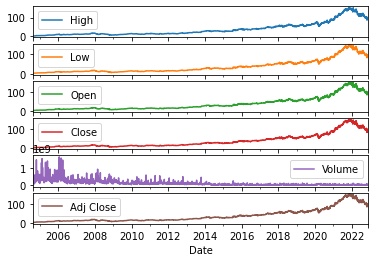

In [4]:
plot_cols = ['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close']
# plot_cols = ['High', 'Low', 'Open', 'Close', 'Adj Close']
plot_features = panel_data[plot_cols]
plot_features.index = date
_ = plot_features.plot(subplots=True)


In [5]:
panel_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
High,6670.0,3.779209e+01,3.516808e+01,2.546046e+00,1.273774e+01,2.286011e+01,5.424550e+01,1.515465e+02
Low,6670.0,3.702673e+01,3.440541e+01,2.401401e+00,1.246115e+01,2.254304e+01,5.300450e+01,1.488990e+02
Open,6670.0,3.742670e+01,3.480085e+01,2.482232e+00,1.262844e+01,2.277327e+01,5.361150e+01,1.512500e+02
Close,6670.0,3.741410e+01,3.479417e+01,2.502753e+00,1.263670e+01,2.275225e+01,5.360037e+01,1.498385e+02
Volume,6670.0,1.261728e+08,1.546711e+08,9.312000e+06,3.368200e+07,7.236578e+07,1.540468e+08,1.643023e+09
Adj Close,6670.0,3.741410e+01,3.479417e+01,2.502753e+00,1.263670e+01,2.275225e+01,5.360037e+01,1.498385e+02


In [6]:
panel_data.drop(columns=['Volume'], axis=1, inplace=True)
panel_data

,High,Low,Open,Close,Adj Close
0,2.604104,2.401401,2.502503,2.511011,2.511011
1,2.729730,2.515015,2.527778,2.710460,2.710460
2,2.729730,2.515015,2.527778,2.710460,2.710460
3,2.729730,2.515015,2.527778,2.710460,2.710460
4,2.839840,2.728979,2.771522,2.737738,2.737738
...,...,...,...,...,...
6665,98.900002,96.370003,98.769997,97.430000,97.430000
6666,98.900002,96.370003,98.769997,97.430000,97.430000
6667,98.900002,96.370003,98.769997,97.430000,97.430000
6668,98.400002,95.360001,97.290001,95.599998,95.599998


# LSTM

In [7]:
column_indices = {name: i for i, name in enumerate(panel_data.columns)}

n = len(panel_data)
train_df = panel_data[0:int(n*0.7)]
val_df = panel_data[int(n*0.7):int(n*0.9)]
test_df = panel_data[int(n*0.9):]

num_features = panel_data.shape[1]

In [8]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
High,4669.0,18.639942,10.626580,2.546046,11.445445,14.739990,27.148001,49.980000
Low,4669.0,18.301682,10.505524,2.401401,11.174174,14.482983,26.663500,49.568001
Open,4669.0,18.484951,10.574332,2.482232,11.325325,14.664164,26.901501,49.810501
Close,4669.0,18.468984,10.565778,2.502753,11.280781,14.589590,26.888000,49.808498
Adj Close,4669.0,18.468984,10.565778,2.502753,11.280781,14.589590,26.888000,49.808498


In [9]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std


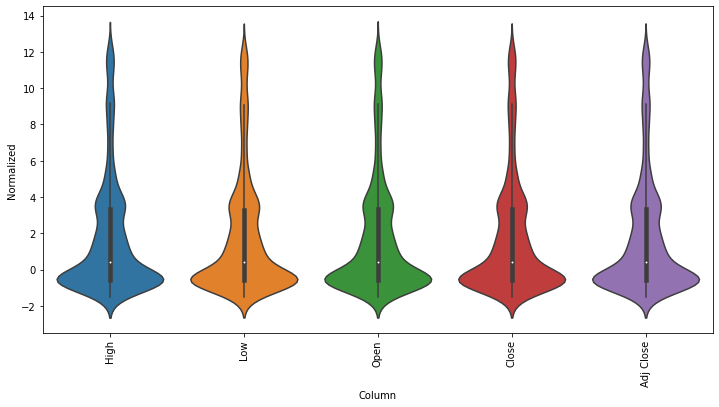

In [10]:
# Look at normalized data
df_std = (panel_data - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(panel_data.keys(), rotation=90)

In [11]:
class TickerData(torch.utils.data.Dataset):
    def __init__(self, df, input_width, target_width):
        ## YOUR CODE HERE ##
        data_np = np.array(df)
        self.inputs = [torch.FloatTensor(data_np[i : i + input_width])
                       for i in range(0, len(data_np) - input_width, input_width)]
        self.targets = [torch.FloatTensor(data_np[i : i + target_width])
                        for i in range(input_width, len(data_np) - target_width, input_width)]
        ## *** ##               
    def __getitem__(self, idx):
        return {'inputs': self.inputs[idx],
                'targets': self.targets[idx]}
    
    def __len__(self):
        return min(len(self.inputs), len(self.targets))

In [12]:
INPUT_WIDTH = 24
TARGET_WIDTH = 24

train_data = TickerData(train_df, INPUT_WIDTH, TARGET_WIDTH)
val_data = TickerData(val_df, INPUT_WIDTH, TARGET_WIDTH)
test_data = TickerData(test_df, INPUT_WIDTH, TARGET_WIDTH)

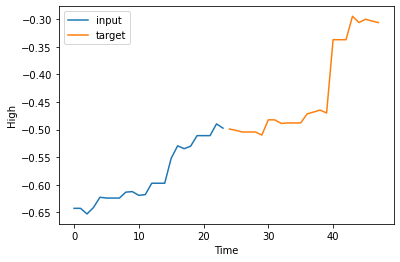

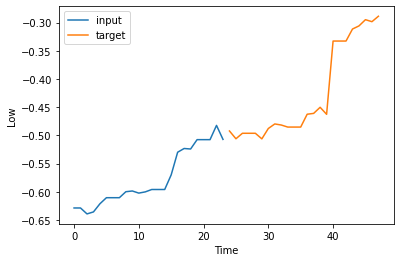

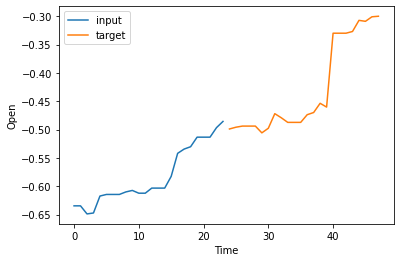

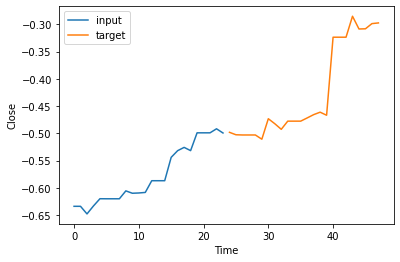

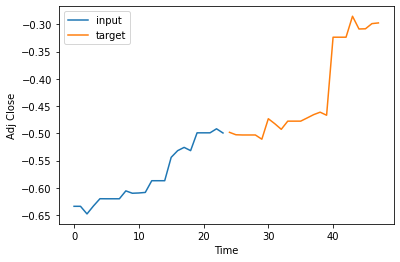

In [13]:
# Let's visualize some examples
idx = random.randint(0, len(train_data))
inputs = train_data[idx]['inputs'].numpy()
targets = train_data[idx]['targets'].numpy()

for i in range(len(train_df.columns)):
    plt.plot(range(INPUT_WIDTH), inputs[:,i], label='input')
    plt.plot(range(INPUT_WIDTH, INPUT_WIDTH + TARGET_WIDTH), targets[:,i], label='target')
    plt.ylabel(train_df.columns[i])
    plt.xlabel('Time')
    plt.legend()
    plt.show()

In [14]:
import torch
import torch.nn as nn
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
from torch.autograd import Variable

In [15]:
lr = 1e-4
batch_size = 50
dropout_keep_prob = 0.5
embedding_size = 300
max_document_length = 100  # each sentence has until 100 words
dev_size = 0.8  # split percentage to train\validation data
max_size = 5000  # maximum vocabulary size
seed = 1
num_classes = 3
num_hidden_nodes = 93
hidden_dim2 = 128
num_layers = 2  # LSTM layers
bi_directional = False 
num_epochs = 7

In [16]:
import torch
import torch.nn as nn
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
from torch.autograd import Variable

class LSTM(nn.Module):

    # define all the layers used in model
    def __init__(self, vocab_size, embedding_dim, lstm_units, hidden_dim , num_classes, lstm_layers,
                 bidirectional, dropout, pad_index, batch_size):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx = pad_index)
        self.lstm = nn.LSTM(embedding_dim,
                            lstm_units,
                            num_layers=lstm_layers,
                            bidirectional=bidirectional,
                            batch_first=True)
        num_directions = 2 if bidirectional else 1
        self.fc1 = nn.Linear(lstm_units * num_directions, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, num_classes)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout)
        self.lstm_layers = lstm_layers
        self.num_directions = num_directions
        self.lstm_units = lstm_units


    def init_hidden(self, batch_size):
        h, c = (Variable(torch.zeros(self.lstm_layers * self.num_directions, batch_size, self.lstm_units)),
                Variable(torch.zeros(self.lstm_layers * self.num_directions, batch_size, self.lstm_units)))
        return h, c

    def forward(self, text, text_lengths):
        batch_size = text.shape[0]
        h_0, c_0 = self.init_hidden(batch_size)

        embedded = self.embedding(text)
        packed_embedded = pack_padded_sequence(embedded, text_lengths, batch_first=True)
        output, (h_n, c_n) = self.lstm(packed_embedded, (h_0, c_0))
        output_unpacked, output_lengths = pad_packed_sequence(output, batch_first=True)
        out = output_unpacked[:, -1, :]
        rel = self.relu(out)
        dense1 = self.fc1(rel)
        drop = self.dropout(dense1)
        preds = self.fc2(drop)
        return preds


In [17]:
# import torch
# import torch.nn as nn
# from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence

# class LSTM(nn.Module):
#     def __init__(self, vocab_size, embedding_dim, hidden_dim1, hidden_dim2, output_dim, n_layers,
#                  bidirectional, dropout, pad_index):
#         super().__init__()
#         self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx = pad_index)
#         self.lstm = nn.LSTM(embedding_dim,
#                             hidden_dim1,
#                             num_layers=n_layers,
#                             bidirectional=bidirectional,
#                             batch_first=True)
#         self.fc1 = nn.Linear(hidden_dim1 * 2, hidden_dim2)
#         self.fc2 = nn.Linear(hidden_dim2, output_dim)
#         self.relu = nn.ReLU()
#         self.dropout = nn.Dropout(dropout)

#     def forward(self, text, text_lengths):
#         embedded = self.embedding(text)
#         packed_embedded = pack_padded_sequence(embedded, text_lengths, batch_first=True) 

#         packed_output, (hidden, cell) = self.lstm(packed_embedded)
#         cat = torch.cat((hidden[-2, :, :], hidden[-1, :, :]), dim=1)
#         rel = self.relu(cat)
#         dense1 = self.fc1(rel)
#         drop = self.dropout(dense1)
#         preds = self.fc2(drop)
#         return preds

In [18]:
def evaluate(model, data_loader, **kwargs):
    loss_fn = kwargs.get('loss_fn', torch.nn.functional.mse_loss)
    device = kwargs.get('device', torch.device('cpu'))
    
    model.eval()
    pbar = tqdm(enumerate(data_loader), total=len(data_loader))
    avg_loss = 0.
    for i, batch in pbar:
        ## YOUR CODE HERE ##
        batch['inputs'] = batch['inputs'].to(device)
        batch['targets'] = batch['targets'].to(device)
        num_steps = batch['targets'].shape[1]
        with torch.no_grad():
            preds = model(batch['inputs'], num_steps)
        loss = loss_fn(preds, batch['targets'])
        avg_loss += loss.item()
        ## *** ##
        pbar.set_description(f'loss = {loss:.3f}')
    avg_loss /= len(data_loader)
    return avg_loss

def fit(model, train_loader, val_loader, optimizer, **kwargs):
    num_epochs = kwargs.get('num_epochs', 100)
    loss_fn = kwargs.get('loss_fn', torch.nn.functional.mse_loss)
    device = kwargs.get('device', torch.device('cpu'))
    
    train_loss_hist, val_loss_hist = [], []
    for epoch in range(num_epochs):
        print(f'Epoch {epoch + 1}/{num_epochs}')
        
        print('Training phase...')
        model.train()
        train_loss = 0.
        pbar = tqdm(enumerate(train_loader), total=len(train_loader))
        for i, batch in pbar:
            ## YOUR CODE HERE ##
            batch['inputs'] = batch['inputs'].to(device)
            batch['targets'] = batch['targets'].to(device)
            model.zero_grad()
            num_steps = batch['targets'].shape[1]
            preds = model(batch['inputs'], num_steps)
            loss = loss_fn(preds, batch['targets'])
            loss.backward()
            optimizer.step()
            ## *** ##
            train_loss += loss.item()
            pbar.set_description(f'loss = {loss:.3f}')
        train_loss /= len(train_loader)
        print(f'train loss = {train_loss:.3f}')
        train_loss_hist.append(train_loss)
        
        print('Validation phase...')
        val_loss = evaluate(model, val_loader, loss_fn=loss_fn, device=device)
        print(f'validation loss = {val_loss:.3f}')
        val_loss_hist.append(val_loss)
        
    return train_loss_hist, val_loss_hist
        

In [19]:
HIDDEN_SIZE = 32
LEARNING_RATE = 1e-3
NUM_EPOCHS = 100
BATCH_SIZE = 16

# hidden_dim1, output_dim, n_layers, bidirectional, dropout, pad_index = 8, 1, 2, False, 0.5, 1

# embedding_dim, lstm_units, hidden_dim, num_classes, lstm_layers, bidirectional, dropout, pad_index, batch_size = 7, x, y, 3

if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
# elif torch.backends.mps.is_available():
#     DEVICE = torch.device('mps')
else:
    DEVICE = torch.device('cpu')
print('DEVICE:', DEVICE)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=BATCH_SIZE)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE)

#                       vocab_size,          embedding_dim, lstm_units, hidden_dim , num_classes, lstm_layers, bidirectional, dropout, pad_index, batch_size
# model = LSTM(train_data[0]['inputs'].shape[1], HIDDEN_SIZE, lstm_units, hidden_dim, num_classes, lstm_layers, bidirectional, dropout, pad_index, batch_size).to(DEVICE)
model = LSTM(vocab_size=train_data[0]['inputs'].shape[1], embedding_dim=7, lstm_units=2, hidden_dim=HIDDEN_SIZE, num_classes=3, lstm_layers=2, bidirectional=True, dropout=0.5, pad_index=0, batch_size=40).to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

DEVICE: cuda


: 

: 

In [32]:
# train_data[0]['inputs'].shape[1]

In [33]:
train_loss, val_loss = fit(model, train_loader, val_loader, optimizer, num_epochs=NUM_EPOCHS, device=DEVICE)

Epoch 1/100
Training phase...


  0%|          | 0/13 [00:00<?, ?it/s]


RuntimeError: Expected tensor for argument #1 'indices' to have one of the following scalar types: Long, Int; but got torch.cuda.FloatTensor instead (while checking arguments for embedding)

In [ ]:
plt.title('Train and validation losses')
plt.plot(range(len(train_loss)), train_loss, label='train loss')
plt.plot(range(len(val_loss)), val_loss, label='validation loss')
plt.legend()
plt.show()

In [ ]:
num_hidden_nodes = 93
hidden_dim2 = 128
num_layers = 2  # LSTM layers
bi_directional = False
num_epochs = 7

to_train = True
# pad_index = Text.vocab.stoi[Text.pad_token]

# Build the model
vocab_size = 30
lstm_model = LSTM(vocab_size, embedding_size, num_hidden_nodes, hidden_dim2 , num_classes, num_layers,
                bi_directional, dropout_keep_prob, pad_index)

# optimization algorithm
optimizer = torch.optim.Adam(lstm_model.parameters(), lr=lr)

# train and evaluation
if (to_train):
    # train and evaluation
    run_train(num_epochs, lstm_model, train_iterator, valid_iterator, optimizer, loss_func, model_type)

    # load weights
lstm_model.load_state_dict(torch.load(os.path.join(path, "saved_weights_LSTM.pt")))
# predict
test_loss, test_acc = evaluate(lstm_model, test_iterator, loss_func)
print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc * 100:.2f}%')

In [ ]:
import os
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') 
path = 'C:/Users/Gal/PycharmProjects/Sentiment_Analyzer'
path_data = os.path.join(path, "data")

# parameters
model_type = "LSTM"
data_type = "token" # or: "morph"

char_based = True
if char_based:
    tokenizer = lambda s: list(s) # char-based
else:
    tokenizer = lambda s: s.split() # word-based

Text.build_vocab(train_data, max_size=max_size)
Label.build_vocab(train_data)
vocab_size = len(Text.vocab)

train_iterator, valid_iterator, test_iterator = create_iterator(train_df, val_df, test_df, batch_size, device)

# loss function
loss_func = nn.CrossEntropyLoss()
lstm_model = LSTM(vocab_size, embedding_size, n_filters, filter_sizes, pool_size, hidden_size, num_classes, dropout_keep_prob)

# optimization algorithm
optimizer = torch.optim.Adam(lstm_model.parameters(), lr=lr)
# train and evaluation
if (to_train):
    # train and evaluation
    run_train(num_epochs, lstm_model, train_iterator, valid_iterator, optimizer, loss_func, model_type)

# load weights
lstm_model.load_state_dict(torch.load(os.path.join(path, "saved_weights_LSTM.pt")))
# predict
test_loss, test_acc = evaluate(lstm_model, test_iterator, loss_func)
print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc * 100:.2f}%')

In [ ]:
!pip install torchinfo


In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn

import torchinfo


In [ ]:
embedding_dim = 200
hidden_dim = 512
n_layers = 2
drop_prob = 0.5

In [ ]:
# seq_model = nn.Sequential(
#     nn.Linear(1, 13),
#     nn.Tanh(),
#     nn.LSTM(embedding_dim, hidden_dim, n_layers, dropout=drop_prob, batch_first=True),
#     nn.Linear(13, 1)
#     )
# seq_model

seq_model = nn.Sequential(
    nn.LSTM(embedding_dim, hidden_dim, n_layers, dropout=drop_prob, batch_first=True),
    nn.LSTM(embedding_dim, hidden_dim, n_layers, dropout=drop_prob, batch_first=True),

    nn.Linear(1, 13),
    nn.Tanh(),
    nn.Linear(13, 1)
    )
seq_model

In [ ]:
batch_size = 32
timesteps = 12
input_features = 16
h1_features = 8
h2_features = 4
h3_features = 2
h4_features = 16
output_features = 1

In [ ]:
class SimpleModel(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.lstm1 = torch.nn.LSTM(input_size=input_features, hidden_size=h1_features)# , bidirectional=True)
    self.lstm2 = torch.nn.LSTM(input_size=h1_features, hidden_size=h2_features)
    self.lstm3 = torch.nn.LSTM(input_size=h2_features, hidden_size=h3_features)
    self.fc1 = torch.nn.Linear(h3_features, h4_features)
    self.relu = torch.nn.ReLU()
    self.fc2 = torch.nn.Linear(h4_features, output_features)
    self.sigmoid = torch.nn.Sigmoid()

  def forward(self, inputs):
    h1, (h1_T,c1_T) = self.lstm1(inputs)
    h2, (h2_T, c2_T) = self.lstm2(h1)
    h3, (h3_T, c3_T) = self.lstm3(h2)
    h4 = self.fc1(h3[-1,:,:])       # inplace of h2[-1,:,:] we can use h2_T. Both are identical
    h4 = self.relu(h4)
    output = self.fc2(h4)
    output = self.sigmoid(output)
    return output

model = SimpleModel()

# def modeloLSTM(inputs, input_features, h1_features, h2_features, h3_features, output_features):
#     lstm1 = torch.nn.LSTM(input_size=input_features, hidden_size=h1_features)
#     lstm2 = torch.nn.LSTM(input_size=h1_features, hidden_size=h2_features)
#     fc1 = torch.nn.Linear(h2_features, h3_features)
#     relu = torch.nn.ReLU()
#     fc2 = torch.nn.Linear(h3_features, output_features)
#     sigmoid = torch.nn.Sigmoid()
    
#     h1, (h1_T,c1_T) = lstm1(inputs)
#     h2, (h2_T, c2_T) = lstm2(h1)
#     h3 = fc1(h2[-1,:,:])       # inplace of h2[-1,:,:] we can use h2_T. Both are identical
#     h3 = relu(h3)
#     output = fc2(h3)
#     output = sigmoid(output)
#     return output

# smpmd = modeloLSTM()

In [ ]:
torchinfo.summary(model,(timesteps, batch_size, input_features))


In [ ]:
look_back = 40
forward_days = 10
num_periods = 20

In [ ]:
#split in Train and Test

division = len(panel_data) - num_periods*forward_days

array_test = panel_data[division-look_back:]
array_train = panel_data[:division]

In [ ]:
#Get the data and splits in input X and output Y, by spliting in `n` past days as input X 
#and `m` coming days as Y.
def processData(data, look_back, forward_days,jump=1):
    X,Y = [],[]
    for i in range(0,len(data) -look_back -forward_days +1, jump):
        X.append(data[i:(i+look_back)])
        Y.append(data[(i+look_back):(i+look_back+forward_days)])
    return np.array(X),np.array(Y)


In [ ]:
X_test,y_test = processData(array_test,look_back,forward_days,forward_days)
y_test = np.array([list(a.ravel()) for a in y_test])

X,y = processData(array_train,look_back,forward_days)
y = np.array([list(a.ravel()) for a in y])

from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.20, random_state=42)

## LSTM

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
import re

import seaborn as sns
import matplotlib.pyplot as plt

import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn

In [ ]:
# creating the dataset and dataloader (with shuffling) for pytorch 

batch_size = 100  # amount of sentences loaded each batch

train_data = TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))
val_data = TensorDataset(torch.from_numpy(X_validate), torch.from_numpy(y_validate))
# test_data = TensorDataset(torch.from_numpy(test_sentences), torch.from_numpy(test_labels))

train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
val_loader = DataLoader(val_data, shuffle=True, batch_size=batch_size)
# test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)

In [ ]:
# choosing the device for pytorch processing

if torch.cuda.is_available():
    device = torch.device('cuda')
elif torch.backends.mps.is_available():
    device = torch.device('mps')
else:
    device = torch.device('cpu')
print('DEVICE:', device)

In [ ]:
# creation of the model class

class Model_Class(nn.Module):
    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
        super(Model_Class, self).__init__()
        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, dropout=drop_prob, batch_first=True)
        self.dropout = nn.Dropout(0.2)
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x, hidden):
        batch_size = x.size(0)
        x = x.long()
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        
        out = self.dropout(lstm_out)
        
        out = self.fc(out)
        out = self.sigmoid(out)
        
        out = out.view(batch_size, -1)
        out = out[:,-1]
        return out, hidden
    
    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device))
        return hidden

# def model_func(vocab_size, output_size, embedding_dim, hidden_dim, n_layers, var_x, hidden, batch_size, drop_prob=0.5):

#     embedding = nn.Embedding(vocab_size, embedding_dim)
#     lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, dropout=drop_prob, batch_first=True)
#     dropout = nn.Dropout(0.2)
#     fc = nn.Linear(hidden_dim, output_size)
#     sigmoid = nn.Sigmoid()

#     batch_size = var_x.size(0)
#     var_x = var_x.long()
#     embeds = embedding(var_x)
#     lstm_out, hidden = lstm(embeds, hidden)
#     lstm_out = lstm_out.contiguous().view(-1, hidden_dim)
    
#     out = dropout(lstm_out)
#     out = fc(out)
#     out = sigmoid(out)
    
#     out = out.view(batch_size, -1)
#     out = out[:,-1]

#     weight = next(self.parameters()).data
#     hidden = (weight.new(n_layers, batch_size, hidden_dim).zero_().to(device),
#                     weight.new(n_layers, batch_size, hidden_dim).zero_().to(device))


    
#     return out, hidden, hidden



In [ ]:
# creation of the model

vocab_size = len(panel_data) + 1
output_size = 1
embedding_dim = 200
hidden_dim = 512
n_layers = 2

model = Model_Class(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)
model.to(device)
print(model)

In [ ]:
# defining the learning rate, criterion for loss calculation and optimizer model
lr=0.005
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [ ]:
# training the model
epochs = 80
counter = 0
print_every = 1
max_gradients = 5
valid_loss_min = np.Inf

model.train()
for i in range(epochs):
    h = model.init_hidden(batch_size)
    
    for inputs, labels in train_loader:
        counter += 1
        h = tuple([e.data for e in h])
        inputs, labels = inputs.to(device), labels.to(device)
        model.zero_grad()
        output, h = model(inputs, h)
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), max_gradients)
        optimizer.step()
        # print(f"Está aqui, counter = {counter}")
        
        if counter%print_every == 0:
            val_h = model.init_hidden(batch_size)
            val_losses = []
            model.eval()
            for inp, lab in val_loader:
                val_h = tuple([each.data for each in val_h])
                inp, lab = inp.to(device), lab.to(device)
                out, val_h = model(inp, val_h)
                val_loss = criterion(out.squeeze(), lab.float())
                val_losses.append(val_loss.item())
                
            model.train()

            if np.mean(val_losses) <= valid_loss_min:
                print("Epoch: {}/{}...".format(i+1, epochs),
                    "Step: {}...".format(counter),
                    "Loss: {:.6f}...".format(loss.item()),
                    "Val Loss: {:.6f}".format(np.mean(val_losses)))
                torch.save(model.state_dict(), 'model//state_dict.pt')  # save model state (wights, etc.)
                torch.save(model, 'model//model_complete.pt')  # save complete model
                print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,np.mean(val_losses)))
                valid_loss_min = np.mean(val_losses)

In [ ]:
NUM_NEURONS_FirstLayer = 40
NUM_NEURONS_SecondLayer = 20
EPOCHS = 80

#Build the model
model = Sequential()
model.add(LSTM(NUM_NEURONS_FirstLayer,input_shape=(look_back,1), return_sequences=True))
model.add(LSTM(NUM_NEURONS_SecondLayer,input_shape=(NUM_NEURONS_FirstLayer,1)))
model.add(Dense(forward_days))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train,y_train,epochs=EPOCHS,validation_data=(X_validate,y_validate),shuffle=True,batch_size=2, verbose=2)